<a href="https://www.kaggle.com/code/shravankumar147/04-resume-parser-and-ranker?scriptVersionId=215097329" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# First, install required packages:
!pip install langchain langchain-community langchain-core langchain_huggingface transformers torch pypdf PyPDF2 PyMuPDF accelerate --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.6 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 66.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.6/411.6 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 102.9 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.4/906.4 MB 1.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.3 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 96

In [2]:
from huggingface_hub import notebook_login

from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
# from langchain_community.llms import HuggingFacePipeline
from langchain_huggingface.llms import HuggingFacePipeline
from langchain_core.prompts import ChatPromptTemplate

In [3]:
# notebook_login()

In [4]:
# Kaggle Approach to login
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
huggingface_token = user_secrets.get_secret("HUGGINGFACE_TOKEN")

In [5]:
# Log in to Hugging Face
from huggingface_hub import login

login(huggingface_token)


The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [6]:
# resumes_path = kagglehub.dataset_download('shravankumar147/resumes')

In [7]:
file_path1 = "/kaggle/input/resumes/Resume_Shravan_Parunandula_20240220.pdf"
file_path2 = "/kaggle/input/resumes/Resume DS.pdf"

In [8]:
from langchain.document_loaders import PyPDFLoader

def extract_pdf_text(file_path: str) -> str:
    """
    Extracts text from a PDF file and returns it as a single string.

    Args:
        file_path (str): The path to the PDF file to be processed.

    Returns:
        str: The concatenated text from all pages of the PDF.
    """
    # Load the PDF using PyPDFLoader
    loader = PyPDFLoader(file_path)

    # Load the document
    documents = loader.load()

    # Concatenate the text from all pages
    extracted_text = "\n".join(doc.page_content for doc in documents)

    return extracted_text

# Example usage
# file_path = file_path1
# print(extract_pdf_text(file_path))


In [9]:
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-3.2-3B-Instruct")
model = AutoModelForCausalLM.from_pretrained("meta-llama/Llama-3.2-3B-Instruct")
task = "text-generation"

# pipe = pipeline(
#     task,
#     model=model,
#     tokenizer=tokenizer,
#     max_length=1024,
#     temperature=0.3,
#     top_p=0.85,
#     repetition_penalty=1.1,
#     do_sample=True,
#     num_return_sequences=1,
#     pad_token_id=tokenizer.eos_token_id
# )

tokenizer_config.json:   0%|          | 0.00/54.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/878 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/20.9k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/1.46G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

In [31]:

pipe = pipeline(
    task,
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=512,
)

Device set to use cuda:0


In [32]:
llm = HuggingFacePipeline(pipeline=pipe)

In [33]:
system_prompt = """You are tasked with parsing a resume. Your objective is to extract relevant information in a valid structured 'JSON' format. Do not write explanations or any other preambles, do not add or write anything out of context, use only the given information"""

human_prompt = """
             **Task:** Extract key information from the following resume text, especially Skills, Experience, Education.

            **Resume Text:**
            {context}

            **Instructions:**
            Please extract the following information and format it in a clear structure as below, assure 
            to maintain these fields intact Skills, Experience, Education, do not change the case to lower, 
            :

            1. **Contact Information:**
            - Name:
            - Email:
            - Phone Number:
            - Website/Portfolio/LinkedIn:
            - Github Profile:

            2. **Education:**
            - Institution Name:
            - Degree:
            - Field of Study:
            - Graduation Date:

            3. **Experience:**
            - Job Title:
            - Company Name:
            - Location:
            - Dates of Employment:
            - Responsibilities/Projects:

            4. **Projects:**
            - Project Title:
            - Description/Technologies Used:
            - Outcomes/Results:

            5. **Skills:**
            - Programming Languages:
            - Technologies/Tools/frameworks:

            6. **Additional Information:** (if applicable)
            - Certifications:
            - Awards or Honors:
            - Professional Affiliations:
            - Languages:

            **Question:**
            {question}

            **Extracted Information:**
        """

In [41]:
context = extract_pdf_text(file_path2)

In [42]:
context = context.replace("|",'')

In [43]:
context

'Bharath Kumar Parunandula\n♂¶ap-¶arker-altHyderabad /envel⌢pebharathkumar1011@gmail.com ♂phone-alt8639078566 /linkedin-inbharathkumar parunandula\n/githubBharathkumar1011\nWelcome\nTo secure an entry-level position as a Junior Data Analyst or Data Scientist, where I can apply my skills in data analysis\nand visualization to contribute to organizational success while continuously developing my expertise. .\nPROJECTS\n• House Prices - Advanced Regression Techniques\n• Titanic - Machine Learning from Disaster\n• Iris dataset\n• Air Quality Index\nCirtificate\n• Programming for Everybody\n• Using Databases with Python\nEducation\nB.tech\nInstitute of Aeronautical Engineering,Aeronautical Engineering\nGPA: 6.18/10\n2014 - 2018\nSkills\n• Programming Languages: Python, SQLite\n• Data Analysis: Statistical analysis, data cleaning, and data visualization\n• Tools and Software: Excel, VS code\n• Machine Learning: Linear regression, decision trees, and clustering\n• Database Management: SQLite\

In [44]:
question = "Extract key information from this resume."
template = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        ("human", human_prompt),
    ]
)

complete_prompt = template.format_messages(context=context, question=question)

In [45]:
print(complete_prompt)

[SystemMessage(content="You are tasked with parsing a resume. Your objective is to extract relevant information in a valid structured 'JSON' format. Do not write explanations or any other preambles, do not add or write anything out of context, use only the given information", additional_kwargs={}, response_metadata={}), HumanMessage(content='\n             **Task:** Extract key information from the following resume text, especially Skills, Experience, Education.\n\n            **Resume Text:**\n            Bharath Kumar Parunandula\n♂¶ap-¶arker-altHyderabad /envel⌢pebharathkumar1011@gmail.com ♂phone-alt8639078566 /linkedin-inbharathkumar parunandula\n/githubBharathkumar1011\nWelcome\nTo secure an entry-level position as a Junior Data Analyst or Data Scientist, where I can apply my skills in data analysis\nand visualization to contribute to organizational success while continuously developing my expertise. .\nPROJECTS\n• House Prices - Advanced Regression Techniques\n• Titanic - Machine

In [46]:
%%time
response = llm.invoke(complete_prompt, skip_prompt=True)

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


CPU times: user 21.3 s, sys: 0 ns, total: 21.3 s
Wall time: 21.3 s


In [73]:
print(response)

 {
  "Contact Information": {
    "Name": "Bharath Kumar Parunandula",
    "Email": "bharathkumar1011@gmail.com",
    "Phone Number": "8639078566",
    "Website/Portfolio/LinkedIn": "linkedin-inbharathkumar parunandula /githubBharathkumar1011",
    "Github Profile": "githubBharathkumar1011"
  },
  "Education": {
    "Institution Name": "Institute of Aeronautical Engineering",
    "Degree": "B.tech",
    "Field of Study": "Aeronautical Engineering",
    "Graduation Date": "2014 - 2018"
  },
  "Experience": {
    "Job Title": "",
    "Company Name": "",
    "Location": "",
    "Dates of Employment": "",
    "Responsibilities/Projects": ""
  },
  "Projects": {
    "Project Title": [
      "House Prices - Advanced Regression Techniques",
      "Titanic - Machine Learning from Disaster",
      "Iris dataset",
      "Air Quality Index"
    ],
    "Description/Technologies Used": [
      "Advanced Regression Techniques",
      "Machine Learning from Disaster",
      "Statistical analysis, dat

In [74]:
resumes = []

In [75]:
type(response)

str

In [76]:
import json

In [77]:
response_dict = json.loads(response)

In [78]:
type(response_dict)

dict

In [79]:
for k,v in response_dict.items():
    print(k)

Contact Information
Education
Experience
Projects
Skills
Additional Information


In [80]:
resumes.append(response_dict)

In [81]:
print(resumes)

[{'Contact Information': {'Name': 'Bharath Kumar Parunandula', 'Email': 'bharathkumar1011@gmail.com', 'Phone Number': '8639078566', 'Website/Portfolio/LinkedIn': 'linkedin-inbharathkumar parunandula /githubBharathkumar1011', 'Github Profile': 'githubBharathkumar1011'}, 'Education': {'Institution Name': 'Institute of Aeronautical Engineering', 'Degree': 'B.tech', 'Field of Study': 'Aeronautical Engineering', 'Graduation Date': '2014 - 2018'}, 'Experience': {'Job Title': '', 'Company Name': '', 'Location': '', 'Dates of Employment': '', 'Responsibilities/Projects': ''}, 'Projects': {'Project Title': ['House Prices - Advanced Regression Techniques', 'Titanic - Machine Learning from Disaster', 'Iris dataset', 'Air Quality Index'], 'Description/Technologies Used': ['Advanced Regression Techniques', 'Machine Learning from Disaster', 'Statistical analysis, data cleaning, and data visualization', 'Linear regression, decision trees, and clustering', 'ETL processes, Exploratory Data Analysis (ED

In [56]:
# Install required library
!pip install sentence_transformers -q

/usr/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [57]:
# Function Definitions

def normalize_text(data_list):
    """
    Combine a list of text entries into a single normalized text block.
    """
    return " ".join(data_list)

def match_resume_to_job(resume_text, job_description, model):
    """
    Compute similarity between resume text and job description using a sentence-transformer model.
    """
    embeddings = model.encode([resume_text, job_description], convert_to_tensor=True)
    similarity = util.cos_sim(embeddings[0], embeddings[1])
    return similarity.item()

def compute_skill_match(skills, job_description):
    """
    Compute the percentage of skills that match the job description.
    """
    matched_skills = [skill for skill in skills if skill.lower() in job_description.lower()]
    return len(matched_skills) / len(skills) if skills else 0

def rank_candidates(resumes, job_description, model):
    """
    Rank candidates based on similarity scores for skills, education, and experience.
    """
    scores = []

    for resume in resumes:
        # Normalize resume sections
        skills_text = normalize_text(resume["Skills"]) 
        experience_text = normalize_text(resume["Experience"])
        education_text = normalize_text(resume["Education"])

        # Compute similarity scores
        skill_score = match_resume_to_job(skills_text, job_description, model)
        experience_score = match_resume_to_job(experience_text, job_description, model)
        education_score = match_resume_to_job(education_text, job_description, model)
        keyword_match_score = compute_skill_match(resume["Skills"], job_description)

        # Weighted total score
        total_score = 0.5 * skill_score + 0.4 * experience_score + 0.1 * education_score + 0.1 * keyword_match_score

        # Collect scores
        scores.append({
            "Name": resume["Name"],
            "Skill Score": skill_score,
            "Experience Score": experience_score,
            "Education Score": education_score,
            "Keyword Match Score": keyword_match_score,
            "Total Score": total_score
        })

    return sorted(scores, key=lambda x: x["Total Score"], reverse=True)

def plot_scores(ranked_candidates):
    """
    Visualize the scores of candidates using a bar chart.
    """
    names = [candidate['Name'] for candidate in ranked_candidates]
    skill_scores = [candidate['Skill Score'] for candidate in ranked_candidates]
    experience_scores = [candidate['Experience Score'] for candidate in ranked_candidates]
    education_scores = [candidate['Education Score'] for candidate in ranked_candidates]
    keyword_match_scores = [candidate['Keyword Match Score'] for candidate in ranked_candidates]

    # Plot setup
    bar_width = 0.2
    index = range(len(names))

    # Create bars for each category
    plt.bar(index, skill_scores, bar_width, label="Skills")
    plt.bar([i + bar_width for i in index], experience_scores, bar_width, label="Experience")
    plt.bar([i + 2 * bar_width for i in index], education_scores, bar_width, label="Education")
    plt.bar([i + 3 * bar_width for i in index], keyword_match_scores, bar_width, label="Keyword Match")

    # Configure plot details
    plt.xticks([i + 1.5 * bar_width for i in index], names)
    plt.xlabel("Candidates")
    plt.ylabel("Scores")
    plt.title("Candidate Comparison")
    plt.legend()

    # Show plot
    plt.tight_layout()
    plt.show()

In [58]:
import re
from sentence_transformers import SentenceTransformer, util
import matplotlib.pyplot as plt

In [59]:
# Load SentenceTransformer model
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.12k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [84]:
import re
from sentence_transformers import SentenceTransformer, util
import matplotlib.pyplot as plt

# Job description for matching
job_description = """Looking for a candidate with expertise in Python, Machine Learning, NLP, and SQL. 
Must have experience in building predictive models and working with large datasets."""

# Sample resumes
resumes = [
    {
        "Name": "John Doe",
        "Education": [
            "- B.Sc. in Computer Science, XYZ University, 2015-2019",
            "- M.Sc. in Data Science, ABC University, 2019-2021"
        ],
        "Skills": ["Python", "Machine Learning", "Deep Learning", "NLP", "SQL"],
        "Experience": [
            "- Data Scientist at DEF Corp (2021-Present)\n  Developed predictive models for customer segmentation.",
            "- Machine Learning Intern at GHI Ltd (2019-2020)\n  Built recommendation systems for e-commerce platforms."
        ]
    },
    {
        "Name": "Jane Smith",
        "Education": [
            "- B.Tech in Information Technology, PQR University, 2014-2018",
            "- Certification in Artificial Intelligence, Online Course, 2020"
        ],
        "Skills": ["Python", "Data Analysis", "SQL", "TensorFlow"],
        "Experience": [
            "- Data Analyst at XYZ Ltd (2018-2021)\n  Analyzed large datasets for business insights.",
            "- Machine Learning Engineer at ABC Tech (2021-Present)\n  Developed models for automated text classification."
        ]
    }
]

In [85]:
resumes

[{'Name': 'John Doe',
  'Education': ['- B.Sc. in Computer Science, XYZ University, 2015-2019',
   '- M.Sc. in Data Science, ABC University, 2019-2021'],
  'Skills': ['Python', 'Machine Learning', 'Deep Learning', 'NLP', 'SQL'],
  'Experience': ['- Data Scientist at DEF Corp (2021-Present)\n  Developed predictive models for customer segmentation.',
   '- Machine Learning Intern at GHI Ltd (2019-2020)\n  Built recommendation systems for e-commerce platforms.']},
 {'Name': 'Jane Smith',
  'Education': ['- B.Tech in Information Technology, PQR University, 2014-2018',
   '- Certification in Artificial Intelligence, Online Course, 2020'],
  'Skills': ['Python', 'Data Analysis', 'SQL', 'TensorFlow'],
  'Experience': ['- Data Analyst at XYZ Ltd (2018-2021)\n  Analyzed large datasets for business insights.',
   '- Machine Learning Engineer at ABC Tech (2021-Present)\n  Developed models for automated text classification.']}]

In [66]:
import json

# # Input JSON (same as before, but updated with possible experience details)
# input_json = {
#     "Contact Information": {
#         "Name": "Bharath Kumar Parunandula",
#         "Email": "bharathkumar1011@gmail.com",
#         "Phone Number": "8639078566",
#         "Website/Portfolio/LinkedIn": "linkedin-inbharathkumar parunandula /githubBharathkumar1011",
#         "Github Profile": "githubBharathkumar1011"
#     },
#     "Education": {
#         "Institution Name": "Institute of Aeronautical Engineering",
#         "Degree": "B.tech",
#         "Field of Study": "Aeronautical Engineering",
#         "Graduation Date": "2014 - 2018"
#     },
#     "Experience": {
#         "Job Title": "Data Analyst",
#         "Company Name": "XYZ Corp",
#         "Location": "Hyderabad, India",
#         "Dates of Employment": "2018 - 2023",
#         "Responsibilities/Projects": "Analyzed large datasets, created dashboards, and generated actionable insights."
#     },
#     "Projects": {
#         "Project Title": [
#             "House Prices - Advanced Regression Techniques",
#             "Titanic - Machine Learning from Disaster",
#             "Iris dataset",
#             "Air Quality Index"
#         ],
#         "Description/Technologies Used": [
#             "Advanced Regression Techniques",
#             "Machine Learning from Disaster",
#             "Statistical analysis, data cleaning, and data visualization",
#             "Linear regression, decision trees, and clustering",
#             "ETL processes, Exploratory Data Analysis (EDA)"
#         ],
#         "Outcomes/Results": [
#             "",
#             "",
#             "",
#             "",
#             ""
#         ]
#     },
#     "Skills": {
#         "Programming Languages": ["Python", "SQLite"],
#         "Technologies/Tools/frameworks": ["Excel", "VS code", "Databases with Python"],
#         "Machine Learning": ["Linear regression, decision trees, and clustering"],
#         "Database Management": ["SQLite"],
#         "Technical Skills": ["ETL processes, Exploratory Data Analysis (EDA)"],
#         "Soft Skills": ["Deep Thinking, teamwork, communication, and attention to detail"]
#     },
#     "Additional Information": {
#         "Certifications": ["Programming for Everybody", "Using Databases with Python"],
#         "Languages": ["The Alchemist"]
#     }
# }

# Function to restructure the JSON
def restructure_json(input_data):
    # Extract name
    name = input_data["Contact Information"]["Name"]
    
    # Combine education into a single formatted string
    education = [
        f"- {input_data['Education']['Degree']} in {input_data['Education']['Field of Study']}, "
        f"{input_data['Education']['Institution Name']}, {input_data['Education']['Graduation Date']}"
    ]
    
    # Combine all skills into a single list
    skills = (
        input_data["Skills"]["Programming Languages"] +
        input_data["Skills"]["Technologies/Tools/frameworks"] +
        input_data["Skills"]["Machine Learning"] +
        input_data["Skills"]["Database Management"] +
        input_data["Skills"]["Technical Skills"] +
        input_data["Skills"]["Soft Skills"]
    )
    
    # Handle experience
    experience = []
    if input_data["Experience"]["Job Title"]:  # Check if experience details are present
        experience.append(
            f"- {input_data['Experience']['Job Title']} at {input_data['Experience']['Company Name']} "
            f"({input_data['Experience']['Dates of Employment']})\n  "
            f"{input_data['Experience']['Responsibilities/Projects']}"
        )
    else:
        experience.append("- (No job experience listed yet)")
    
    # Combine projects into concise descriptions
    projects = [
        f"- {title}: {desc}" for title, desc in zip(
            input_data["Projects"]["Project Title"],
            input_data["Projects"]["Description/Technologies Used"]
        )
    ]
    
    # Extract certifications
    certifications = [f"- {cert}" for cert in input_data["Additional Information"]["Certifications"]]
    
    # Return restructured JSON
    return {
        "Name": name,
        "Education": education,
        "Skills": skills,
        "Experience": experience,
        "Projects": projects,
        "Certifications": certifications
    }

In [86]:
# Restructure the JSON
input_json = response_dict
restructured_json = restructure_json(input_json)

# Wrap in a "resumes" list
new_resumes = [restructured_json]

# Print the result
print(json.dumps(new_resumes, indent=4))

[
    {
        "Name": "Bharath Kumar Parunandula",
        "Education": [
            "- B.tech in Aeronautical Engineering, Institute of Aeronautical Engineering, 2014 - 2018"
        ],
        "Skills": [
            "Python",
            "SQLite",
            "Excel",
            "VS code",
            "Databases with Python",
            "Linear regression, decision trees, and clustering",
            "SQLite",
            "ETL processes, Exploratory Data Analysis (EDA)",
            "Deep Thinking, teamwork, communication, and attention to detail"
        ],
        "Experience": [
            "- (No job experience listed yet)"
        ],
        "Projects": [
            "- House Prices - Advanced Regression Techniques: Advanced Regression Techniques",
            "- Titanic - Machine Learning from Disaster: Machine Learning from Disaster",
            "- Iris dataset: Statistical analysis, data cleaning, and data visualization",
            "- Air Quality Index: Linear regres

In [87]:
resumes

[{'Name': 'John Doe',
  'Education': ['- B.Sc. in Computer Science, XYZ University, 2015-2019',
   '- M.Sc. in Data Science, ABC University, 2019-2021'],
  'Skills': ['Python', 'Machine Learning', 'Deep Learning', 'NLP', 'SQL'],
  'Experience': ['- Data Scientist at DEF Corp (2021-Present)\n  Developed predictive models for customer segmentation.',
   '- Machine Learning Intern at GHI Ltd (2019-2020)\n  Built recommendation systems for e-commerce platforms.']},
 {'Name': 'Jane Smith',
  'Education': ['- B.Tech in Information Technology, PQR University, 2014-2018',
   '- Certification in Artificial Intelligence, Online Course, 2020'],
  'Skills': ['Python', 'Data Analysis', 'SQL', 'TensorFlow'],
  'Experience': ['- Data Analyst at XYZ Ltd (2018-2021)\n  Analyzed large datasets for business insights.',
   '- Machine Learning Engineer at ABC Tech (2021-Present)\n  Developed models for automated text classification.']}]

In [88]:
resumes.append(new_resumes[0])

In [89]:
resumes

[{'Name': 'John Doe',
  'Education': ['- B.Sc. in Computer Science, XYZ University, 2015-2019',
   '- M.Sc. in Data Science, ABC University, 2019-2021'],
  'Skills': ['Python', 'Machine Learning', 'Deep Learning', 'NLP', 'SQL'],
  'Experience': ['- Data Scientist at DEF Corp (2021-Present)\n  Developed predictive models for customer segmentation.',
   '- Machine Learning Intern at GHI Ltd (2019-2020)\n  Built recommendation systems for e-commerce platforms.']},
 {'Name': 'Jane Smith',
  'Education': ['- B.Tech in Information Technology, PQR University, 2014-2018',
   '- Certification in Artificial Intelligence, Online Course, 2020'],
  'Skills': ['Python', 'Data Analysis', 'SQL', 'TensorFlow'],
  'Experience': ['- Data Analyst at XYZ Ltd (2018-2021)\n  Analyzed large datasets for business insights.',
   '- Machine Learning Engineer at ABC Tech (2021-Present)\n  Developed models for automated text classification.']},
 {'Name': 'Bharath Kumar Parunandula',
  'Education': ['- B.tech in Ae

In [90]:
# Rank candidates
ranked_candidates = rank_candidates(resumes, job_description, model)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

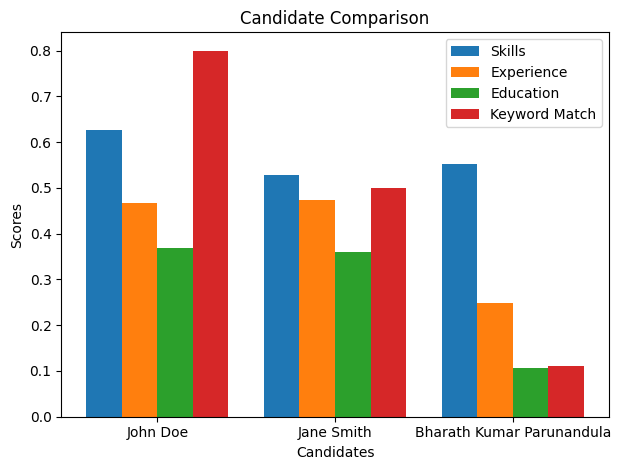

In [91]:
# Plot the scores
plot_scores(ranked_candidates)